In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# inspection of data

In [ ]:
data=pd.read_csv("/content/netflix.txt")

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
for column in data.columns:
  print(f"No of unique values in {column} is {data[column].nunique()}")

No of unique values in show_id is 8807
No of unique values in type is 2
No of unique values in title is 8807
No of unique values in director is 4528
No of unique values in cast is 7692
No of unique values in country is 748
No of unique values in date_added is 1767
No of unique values in release_year is 74
No of unique values in rating is 17
No of unique values in duration is 220
No of unique values in listed_in is 514
No of unique values in description is 8775


# data cleaning

In [ ]:
# keep title to treat as primary key
## Drop columns with all unique value
for column in data.columns:
  if (data[column].nunique() == data[~data[column].isna()].shape[0]) and (column != 'title'):
    data.drop(column,axis=1,inplace=True)


##working with description data to identify duplicate

In [ ]:


description_value_counts=data['description'].value_counts()


In [ ]:
value_to_keep=description_value_counts[description_value_counts>1].index

In [ ]:
repeated_description=data[data['description'].isin(value_to_keep)].sort_values('description')
repeated_description.head(5)


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
78,Movie,Tughlaq Durbar,Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",NaN,"September 11, 2021",2020,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
79,Movie,Tughlaq Durbar (Telugu),Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",NaN,"September 11, 2021",2021,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
7022,Movie,Hum Saath-Saath Hain,Sooraj R. Barjatya,"Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...",India,"January 1, 2018",1999,TV-G,176 min,"Dramas, International Movies, Music & Musicals",A scheming matriarch plots to cut off her disa...
2969,Movie,Together For Eternity,Sooraj R. Barjatya,"Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...",India,"February 1, 2020",1999,TV-G,176 min,"Dramas, International Movies, Music & Musicals",A scheming matriarch plots to cut off her disa...
3492,Movie,Oh! Baby (Malayalam),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",NaN,"September 25, 2019",2019,TV-14,146 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...


In [ ]:

# since these descriptions are same
def select_best_row(group):
    """Selects the row with the fewest missing values from a group."""
    return group.loc[group.isnull().sum(axis=1).idxmin()]

data=data.groupby('description').apply(select_best_row)
# drop column with all unique values

for column in data.columns:
  if (data[column].nunique() == data[~data[column].isna()].shape[0]) and (column != 'title'):
    data.drop(column,axis=1,inplace=True)

In [ ]:
data.reset_index(drop=True,inplace=True)

## handle mutiple value in relevant columns

In [ ]:
mutiple_value_columns=['director','cast','country','listed_in']
for each_column in mutiple_value_columns:
  data[each_column]=data[each_column].str.split(", ")
  data=data.explode(each_column)

## handle missing values in director cast and country

In [ ]:
# fill most frequent director in country,type,listed_in similary cast and country hirarchy
def get_mode(series):
    mode = series.mode()
    return mode[0] if not mode.empty else None

column_and_group_mapping_to_fill = {
    "director": [['country', 'type', 'listed_in'], ['type', 'listed_in'], ['type']],
    "cast": [['country', 'type', 'listed_in'], ['type', 'listed_in'], ['type']],
    "country": [['type', 'listed_in'], ['type']]
}

for column_to_fill, hierarchies in column_and_group_mapping_to_fill.items():
    for hierarchy in hierarchies:
        mode_df = data.groupby(hierarchy)[column_to_fill].apply(get_mode).reset_index()
        suffix = "_".join(hierarchy) + "_mode"
        data = pd.merge(data, mode_df, on=hierarchy, how='left', suffixes=("", f"_{suffix}"))
        data[column_to_fill] = data[column_to_fill].fillna(data[f"{column_to_fill}_{suffix}"])
        data.drop(columns=[f"{column_to_fill}_{suffix}"], inplace=True)

## handle remaining missing value

In [ ]:
data.isna().sum()*100/data.shape[0]

type            0.000000
title           0.000000
director        0.000000
cast            0.000000
country         0.000000
date_added      0.078495
release_year    0.000000
rating          0.033286
duration        0.001490
listed_in       0.000000
dtype: float64

In [ ]:
# data missing is less than 0.1% we can drop it
data.dropna(inplace=True)


# feature engineering

In [ ]:
data['date_added'] = data['date_added'].str.strip()

In [ ]:
data['month_added']=pd.to_datetime(data['date_added'],format='%B %d, %Y').dt.month_name()

In [ ]:
data['duration']=data['duration'].str.replace(" min","").str.replace(" Season","").str.replace(" Seasons","").str.replace("s","").str.strip().astype("int")

In [ ]:
data['day_added']=pd.to_datetime(data['date_added'],format='%B %d, %Y').dt.day_name()

In [ ]:
data.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,day_added
0,Movie,Bridgerton - The Afterparty,Paul Reubens,David Spade,United States,"July 13, 2021",2021,TV-14,39,Movies,July,Tuesday
1,Movie,Bridgerton - The Afterparty,Paul Reubens,London Hughes,United States,"July 13, 2021",2021,TV-14,39,Movies,July,Tuesday
2,Movie,Bridgerton - The Afterparty,Paul Reubens,Fortune Feimster,United States,"July 13, 2021",2021,TV-14,39,Movies,July,Tuesday
3,Movie,Chelsea Peretti: One of the Greats,Lance Bangs,Chelsea Peretti,United States,"November 14, 2014",2014,TV-MA,75,Stand-Up Comedy,November,Friday
4,Movie,Trevor Noah: Son of Patricia,David Paul Meyer,Trevor Noah,United States,"November 20, 2018",2018,TV-MA,64,Stand-Up Comedy,November,Tuesday


# eda

## Listing_analysis

In [ ]:
data.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,day_added
0,Movie,Bridgerton - The Afterparty,Paul Reubens,David Spade,United States,"July 13, 2021",2021,TV-14,39,Movies,July,Tuesday
1,Movie,Bridgerton - The Afterparty,Paul Reubens,London Hughes,United States,"July 13, 2021",2021,TV-14,39,Movies,July,Tuesday
2,Movie,Bridgerton - The Afterparty,Paul Reubens,Fortune Feimster,United States,"July 13, 2021",2021,TV-14,39,Movies,July,Tuesday
3,Movie,Chelsea Peretti: One of the Greats,Lance Bangs,Chelsea Peretti,United States,"November 14, 2014",2014,TV-MA,75,Stand-Up Comedy,November,Friday
4,Movie,Trevor Noah: Son of Patricia,David Paul Meyer,Trevor Noah,United States,"November 20, 2018",2018,TV-MA,64,Stand-Up Comedy,November,Tuesday


In [ ]:
listed=data[['title','listed_in','type']]

In [ ]:
listed.drop_duplicates(inplace=True)

<ipython-input-25-4e1cccc110da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listed.drop_duplicates(inplace=True)


In [ ]:
top_5_listings=listed.groupby(['type','listed_in']).agg({"title":"count"}).rename({"title":"title_count"},axis=1).sort_values(['type','title_count'],ascending=False).groupby(level=0).head(10).reset_index()

<Axes: xlabel='title_count', ylabel='listed_in'>

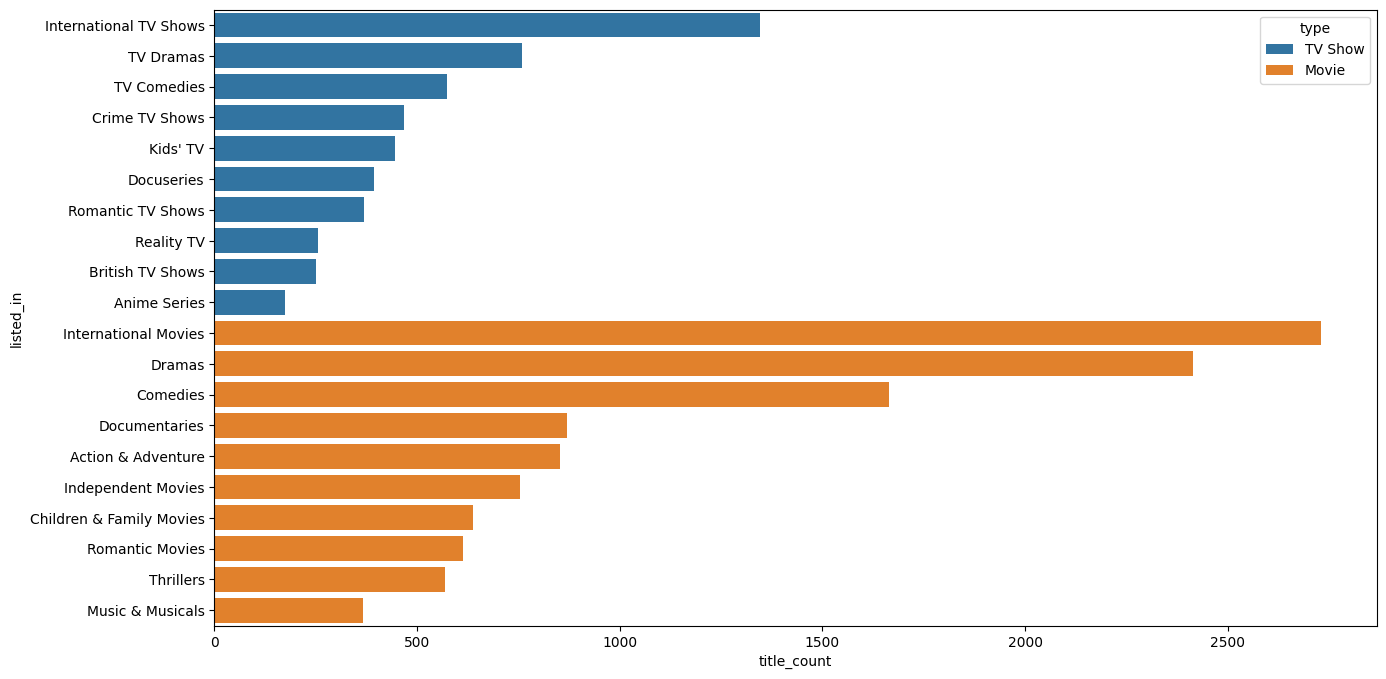

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(y="listed_in", x="title_count", data=top_5_listings,hue='type')

### listing day in these categories

In [ ]:
top_listings=top_5_listings['listed_in'].to_list()
listings_on_day=data[data['listed_in'].isin(top_listings)]

In [ ]:
listings_on_day=listings_on_day[['title','day_added']]

In [ ]:
listings_on_day=listings_on_day.drop_duplicates()

In [ ]:
count_of_listing_day_wise=listings_on_day.groupby('day_added').agg({"day_added":"count"}).rename({"day_added":"count_of_listings"},axis=1).reset_index()

In [ ]:
count_of_listing_day_wise=count_of_listing_day_wise.sort_values('count_of_listings',ascending=False)

<Axes: xlabel='count_of_listings', ylabel='day_added'>

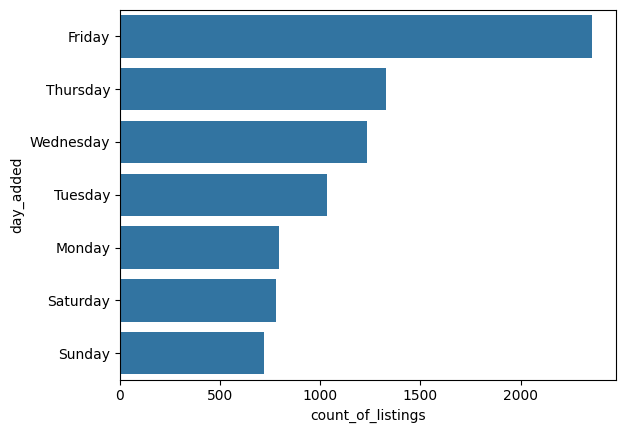

In [ ]:
sns.barplot(data=count_of_listing_day_wise,x='count_of_listings',y='day_added')
# conclusion most listing is done on friday which is toward weekends but saturday is less than wednesday and thursday
# recommendation list more movies towards weekend i.e on saturday

In [ ]:
import requests
import json
FSN='MOBGT4RZUPKD8HDK'

In [ ]:
import requests
import json
FSN='MOBGT4RZUPKD8HDK'
url = "https://1.rome.api.flipkart.com/api/4/page/fetch"

payload = json.dumps({
"pageUri": f"/a/p/a?pid={FSN}",
"locationContext": {
    "pincode": "560066"
},
"isReloadRequest": True
})
headers = {
'Accept': '*/*',
'Accept-Language': 'en-US,en;q=0.9,en-IN;q=0.8',
'Connection': 'keep-alive',
'Content-Type': 'application/json',
'Cookie': 'T=clpxn4xzy06470wd2ztjy5pj8-BR1702101250078; dpr=1; _pxvid=60779be7-9657-11ee-af89-338edb3a8d5b; vh=752; vw=1530; _gcl_au=1.1.1079217834.1702903922; _gid=GA1.2.6600805.1705499941; mp_9ea3bc9a23c575907407cf80efd56524_mixpanel=%7B%22distinct_id%22%3A%20%22ACC9644F91FB39448188106BA68C24709F8D%22%2C%22%24device_id%22%3A%20%2218d17b7d4db777-06bb98bdf4808a-17462c6f-15f900-18d17b7d4dc131c%22%2C%22%24initial_referrer%22%3A%20%22%24direct%22%2C%22%24initial_referring_domain%22%3A%20%22%24direct%22%2C%22%24user_id%22%3A%20%22ACC9644F91FB39448188106BA68C24709F8D%22%7D; AMCVS_55CFEDA0570C3FA17F000101%40AdobeOrg=1; AMCV_55CFEDA0570C3FA17F000101%40AdobeOrg=-227196251%7CMCIDTS%7C19740%7CMCMID%7C36873895514639056584390477893388312916%7CMCAAMLH-1706104756%7C12%7CMCAAMB-1706104756%7CRKhpRz8krg2tLO6pguXWp5olkAcUniQYPHaMWWgdJ3xzPWQmdj0y%7CMCOPTOUT-1705507156s%7CNONE%7CMCAID%7CNONE; _ga=GA1.2.1489252585.1702903922; _ga_TVF0VCMCT3=GS1.1.1705499940.6.1.1705499956.44.0.0; moe_uuid=990b4aa9-f52e-4592-9703-947b29f8da91; s_nr=1705500035468-Repeat; _ga_0SJLGHBL81=GS1.1.1705499940.6.1.1705500035.0.0.0; Network-Type=4g; AMCVS_17EB401053DAF4840A490D4C%40AdobeOrg=1; AMCV_17EB401053DAF4840A490D4C%40AdobeOrg=-227196251%7CMCIDTS%7C19741%7CMCMID%7C43990386728713327323661047710453072722%7CMCAAMLH-1706176097%7C12%7CMCAAMB-1706176097%7C6G1ynYcLPuiQxYZrsz_pkqfLG9yMXBpb2zX5dvJdYQJzPXImdj0y%7CMCOPTOUT-1705578497s%7CNONE%7CMCAID%7CNONE; pxcts=b4dffb16-b5e6-11ee-a796-bd365d618683; gpv_pn=HomePage; gpv_pn_t=FLIPKART%3AHomePage; S=d1t13P0sadT9JJUk/JQw/P1AiP7GEZg72uHn1BywMA2YYqzym/ipIjlSKvGXCMl2+ODGqUk3V1EktVIchHi3l8HcUow==; SN=VI8048300B964C487589C255C8EEDFE61D.TOK8534926BDA00472D8AF6CFA1D9EFC397.1705571443.LO; _px3=dc9ad67f3ac3f8530015aa57bcf00ca8ad654686b055df2e62665772dd21c810:N2lC4bvOxP1U39ED7T1OG83imRzCF61gigkr3yAb9cq3PcTni0XzA3GIARmuZ3dL1wz5EeyBWxO5wcRGa+bWyA==:1000:urP/XRgIzylJ912q+GaBtEKufjbtpLRXGUGJ36h49BjraJTL9mbOir+AkO/DH2hy6s5fO97Wg0d9HNLgIXdZPmP79isB+gBjpuFMST5isimWGxNPlQ59JyTbAn3W17gTH24Z3q+p/Hh7mYLMDQLn2507T8KbNLOwU9M6LwuS9S4GIk30DhaYVrrw5G/edMaT3+Uy5pagpr+6aH2n61rEpo7h4Kg+XYkVsG55qtNyxU4=; s_sq=flipkart-prd%3D%2526pid%253Dwww.flipkart.com%25253Abraun-face-mini-hair-remover-fs1000-cordless-epilator-women%25253Ap%25253Aitm3b6779c5ca9be%2526pidt%253D1%2526oid%253DfunctionSr%252528%252529%25257B%25257D%2526oidt%253D2%2526ot%253DLI%26flipkartsellerprod%3D%2526c.%2526a.%2526activitymap.%2526page%253Dhttps%25253A%25252F%25252Fseller.flipkart.com%25252Findex.html%252523dashboard%25252Flistings-management%25253FlistingState%25253DACTIVE%2526link%253DDownload%2526region%253Dbulk-file-history%2526.activitymap%2526.a%2526.c%2526pid%253Dhttps%25253A%25252F%25252Fseller.flipkart.com%25252Findex.html%252523dashboard%25252Flistings-management%25253FlistingState%25253DACTIVE%2526oid%253Dhttps%25253A%25252F%25252Fseller.flipkart.com%25252Fnapi%25252Flisting%25252FstockFileDownload%25253FsellerId%25253D948d1f55eead4eaa%252526fileId%25253D%2525252Fopera%2526ot%253DA',
'Origin': 'https://www.flipkart.com',
'Referer': 'https://www.flipkart.com/',
'Sec-Fetch-Dest': 'empty',
# 'Sec-Fetch-Mode': 'cors',
'Sec-Fetch-Site': 'same-site',
'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
'X-User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36 FKUA/website/42/website/Desktop',
'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
'sec-ch-ua-mobile': '?0',
'sec-ch-ua-platform': '"Linux"'
}

response = requests.request("POST", url, headers=headers, data=payload)


data = json.loads(response.text)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
response

<Response [500]>